<a href="https://colab.research.google.com/github/Hugo-16/analise-dados-airbnb/blob/main/Analisando_os_Dados_do_Airbnb_(Amsterdam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Amsterdam

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

---

## Obtenção dos Dados



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-08-06/visualisations/listings.csv")

---

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,279,2019-11-21,2.88,1,132
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,106,1,339,2020-03-27,3.68,2,0
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,100,14,5,2020-01-02,0.12,1,57
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,221,2020-07-25,2.14,1,182
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,343,2020-02-06,4.53,2,295


É possível observar que a variável *neighbourhood_group* possui alguns valores ausentes. Vamos verificar se  
toda a coluna está da mesma forma. 


In [ ]:
df.neighbourhood_group.unique()

array([nan])

---

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 16478
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

---

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  13.709188
last_review                        13.709188
host_name                           0.333778
name                                0.188130
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

---

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

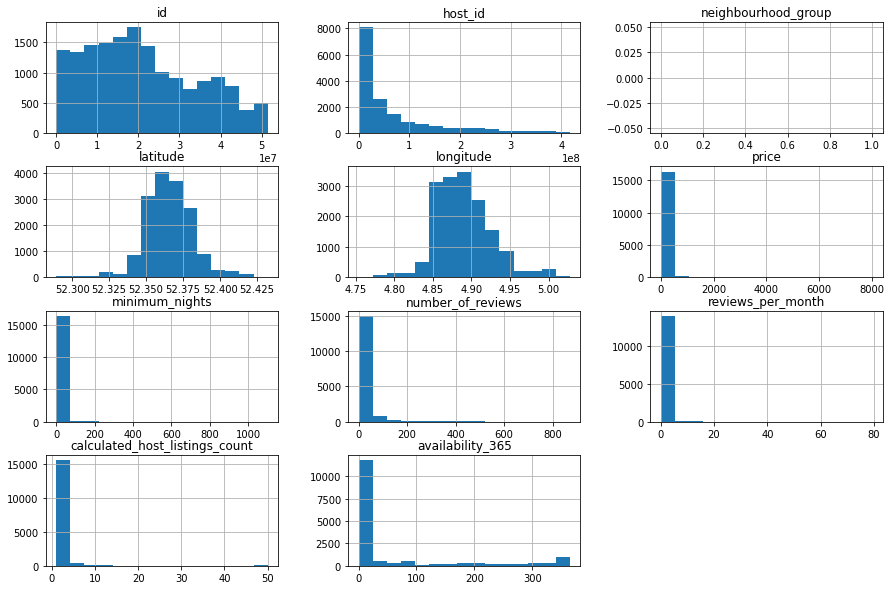

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

---

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16478.000000,16478.000000,16478.000000,14219.000000,16478.000000,16478.000000
mean,156.873225,3.934337,24.295181,0.636915,1.768418,57.931484
std,173.111294,19.445875,56.040299,1.410119,3.544618,110.056511
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,96.000000,2.000000,2.000000,0.110000,1.000000,0.000000
50%,130.000000,2.000000,8.000000,0.270000,1.000000,0.000000
75%,180.000000,3.000000,21.000000,0.610000,1.000000,54.000000
max,8000.000000,1100.000000,871.000000,79.290000,50.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

Na variável **price** o valor máximo em **EURO € é de 8000** (apróx. BRL 50.351) já configura uma distorção (que pode afetar o desvío padrão), considerando que o 75% da amostra encontra-se abaixo de **Euro € 180**.

Na variável **minimum_nights** temos um valor máximo de 11000 noites (a variável deveria ser menor ou igual do que 365 dias). Nesse caso o valor é outlier, considerando que o 75% dos valores da variável é menor ou igual do que 3 noites.

O valor máximo da variável **calculated_host_listings_count** também se encontra bastante acima da média, considerando que o 75% dos valores é igual ou menor do que 1 propriedade por anfitrião.

#### Boxplot para minimum_nights


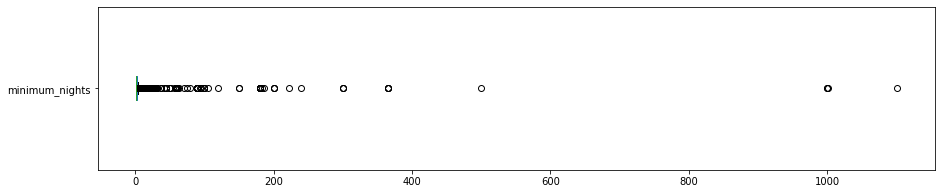

minimum_nights: valores acima de 30:
92 entradas
0.5583%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print(f"{len(df[df.minimum_nights > 30])} entradas")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

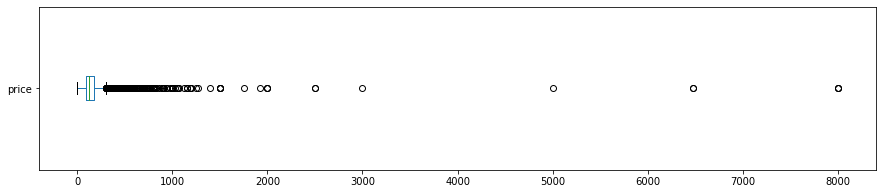


price: valores acima de 600€
118 entradas
0.7161%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 600€ para price
print("\nprice: valores acima de 600€")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

#### Boxplot calculated_host_listings_count

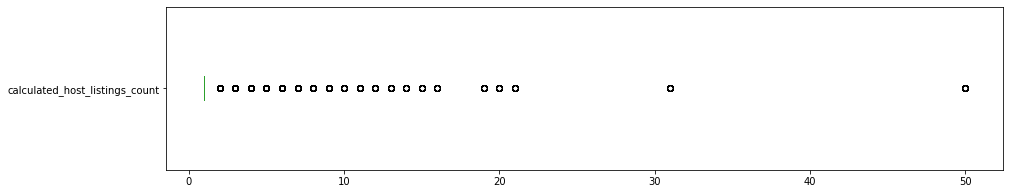


price: valores acima de 70
157 entradas
0.9528%


In [ ]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
print("\nprice: valores acima de 70")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 15])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count >15]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count `, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

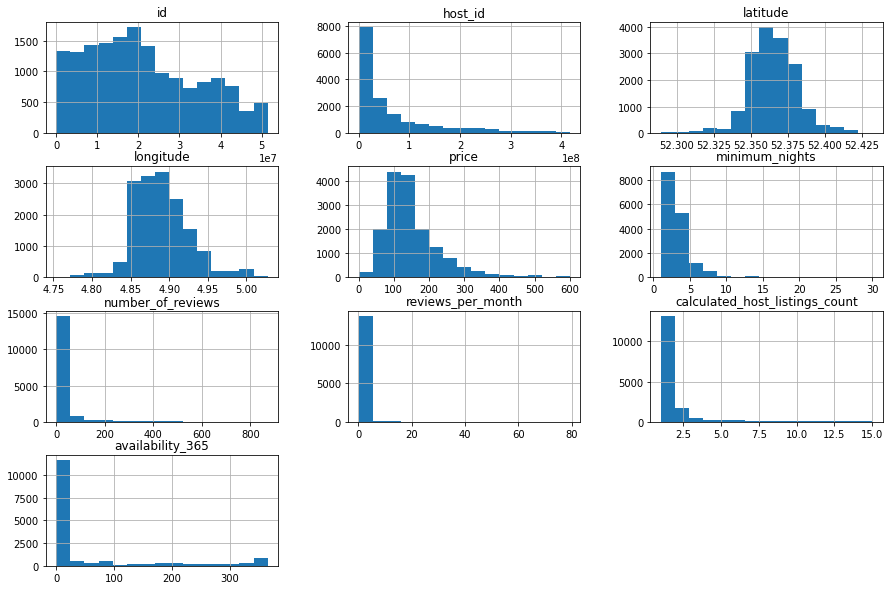

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 15].index, axis=0, inplace= True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

---

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da variável prince
df_clean.price.mean()

148.9604193808549

A média para alugar um imóvel via Airbnb em Amsterdam é de aproximadamente EURO € 148.96 (BRL 937,14).

---

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.006580,-0.111140,-0.096715,0.005589,0.140721
minimum_nights,0.006580,1.000000,-0.074830,-0.091519,-0.025748,-0.007331
number_of_reviews,-0.111140,-0.074830,1.000000,0.612046,0.025909,0.256533
reviews_per_month,-0.096715,-0.091519,0.612046,1.000000,0.177898,0.292720
calculated_host_listings_count,0.005589,-0.025748,0.025909,0.177898,1.000000,0.258501
availability_365,0.140721,-0.007331,0.256533,0.292720,0.258501,1.000000


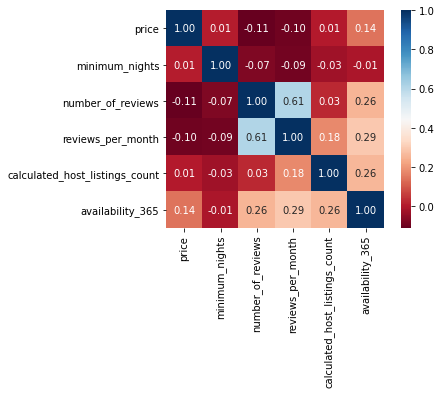

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

---

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12559
Private room        3423
Hotel room            93
Shared room           44
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    77.914263
Private room       21.235809
Hotel room          0.576959
Shared room         0.272970
Name: room_type, dtype: float64

---

### **Q8. Qual a localidade mais cara de Amsterdam?**



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                173.699942
Centrum-Oost                173.155816
Zuid                        162.285343
IJburg - Zeeburgereiland    161.531646
De Pijp - Rivierenbuurt     156.358224
Oud-Noord                   148.528626
Watergraafsmeer             146.892308
Westerpark                  146.382594
De Baarsjes - Oud-West      145.384903
Oud-Oost                    143.020599
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

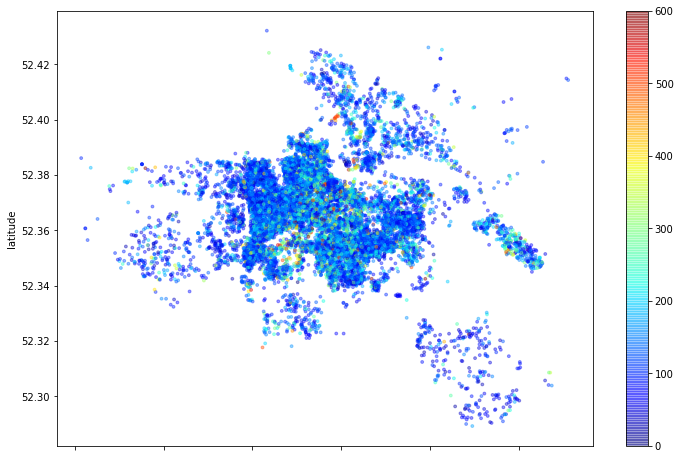

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Realizamos uma análise exploratória de dados do Airbnb em Amsterdam.

* Descobrimos que o dataset possuía algumas variáveis com valores faltantes (missings data), e que também possuia outliers que poderiam distorcer os resultados da análise. Em vista disso, o dataframe foi limpo, eliminando os outliers sem afetar a qualidade da base.

*  Observamos que a média para alugar um imóvel artravés do Airbnb em Amsterdam é de aproximadamente EURO € 148.96 (BRL 937,14).

* Além disso obeservamos que em média, Centrum West e Centrum Oost, são as localidades mais caras para se aludar em Amsterdam.